In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import seaborn as sns


In [2]:
files = ["EDUCATIONSPEND",
"POPGROWTH",
"LIFEXP",
"MIGRATION",
"GDP",
"GDPGROWTH",
"GDPPERCAP",
"INDUSTPRODGR",
"WORKFORCE",
"UNEMPLOYMENT",
"BUDGET",
"PUBLICDEBT",
"CURACCT",
"EXPORTS",
"IMPORTS",
"DEBTFOREIGNERS",
"AIRPORTS",
"MILIEXPENDITURE",
"RAILWAYS",
"ROADWAYS",
"WATERWAYS",
"MARMERCHANT",
"continent",
"electricconsupmtion",
"emissions",
"fossilelectricity",
"hydroelectricity",
"internetusers",
"naturalgasconsumption",
"nuclearelectricity",
"otherrenewableelectricity",
"petroleumconsumption",
"AREA",
"POPULATION"]


In [3]:
pd_dict = {}
for file in files:
    pd_dict[file] = pd.read_csv('{}.csv'.format(file))



In [4]:
pd_dict['AIRPORTS'].head()

,Unnamed: 0,COUNTRY,AIRPORTS,YEAR
0,1,United States,"13,513",2013
1,2,Brazil,"4,093",2013
2,3,Mexico,"1,714",2013
3,4,Canada,"1,467",2013
4,5,Russia,"1,218",2013


In [5]:
base_df = pd_dict['continent']
area_df = pd_dict['AREA']
petrol_df = pd_dict['petroleumconsumption']
users_df = pd_dict['internetusers']
hydro_df = pd_dict['hydroelectricity']
nuclear_df = pd_dict['nuclearelectricity']
otherrenew_df = pd_dict['otherrenewableelectricity']
mili_df = pd_dict['MILIEXPENDITURE']
co2_df = pd_dict['emissions']
mili_df.rename(columns = {'% OF GDP':'mili_exp_%_gdp'}, inplace = True)


In [6]:
for i, row in base_df.iterrows(): 
    row['country_name'] = row['country_name'].split(",")
    row ['country_name'] = row['country_name'][0]

In [7]:
base_df.head()

,continent_name,country_name
0,Asia,Afghanistan
1,Europe,Albania
2,Antarctica,Antarctica (the territory South of 60 deg S)
3,Africa,Algeria
4,Oceania,American Samoa


In [8]:
mili_df.head()

,Unnamed: 0,COUNTRY,mili_exp_%_gdp,YEAR,Unnamed: 4
0,1,Saudi Arabia,8.78,2018,NaN
1,2,Oman,8.17,2018,NaN
2,3,United Arab Emirates,5.70,2016,NaN
3,4,Algeria,5.27,2018,NaN
4,5,Kuwait,5.06,2018,NaN


In [9]:
base_df.rename(columns = {'country_name':'Country'}, inplace = True)
df1 = base_df.merge(area_df, on = 'Country', how = 'outer')

df1.rename(columns = {'Country':'country'}, inplace = True)
df2 = df1.merge(petrol_df, on = 'country', how = 'outer')
df3 = df2.merge(users_df, on = 'country', how = 'outer')
df4 = df3.merge(hydro_df, on = 'country', how = 'outer')
df5 = df4.merge(nuclear_df, on = 'country', how = 'outer')
df6 = df5.merge(otherrenew_df, on = 'country', how = 'outer')
mili_df.rename(columns = {'COUNTRY':'country'}, inplace = True)
df7 = df6.merge(mili_df, on = 'country', how = 'outer')
df8 = df7.merge(co2_df, on = 'country', how = 'outer')


df8.head()



,continent_name,country,Index,Area_sqKm,Unnamed: 0_x,refined_petroleum_consumption_barrels_per_day,year_x,Unnamed: 4_x,Unnamed: 0_y,number_of_internet_users,...,year_y,Unnamed: 4_y,Unnamed: 0_y,mili_exp_%_gdp,YEAR,Unnamed: 4_x,Unnamed: 0,year,carbon_emissions_from_energy_consumption_MT,Unnamed: 4_y
0,Asia,Afghanistan,42.0,"652,230.00",117.0,"35,000",2016.0,est.,NaN,NaN,...,2017.0,est.,116.0,0.99,2018.0,NaN,111.0,2017.0,"9,067,000.00",est.
1,Europe,Albania,145.0,"28,748.00",120.0,"29,000",2016.0,est.,111.0,"2,016,516",...,2017.0,est.,97.0,1.26,2019.0,est.,136.0,2017.0,"4,500,000.00",est.
2,Antarctica,Antarctica (the territory South of 60 deg S),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa,Algeria,11.0,"2,381,740.00",37.0,"405,000",2016.0,est.,37.0,"17,291,463",...,2017.0,est.,4.0,5.27,2018.0,NaN,34.0,2017.0,"135,900,000.00",est.
4,Oceania,American Samoa,216.0,224,192.0,"2,375",2016.0,est.,206.0,"17,000",...,2017.0,est.,NaN,NaN,NaN,NaN,189.0,2017.0,"361,100.00",est.


In [10]:
final_df = df8[['continent_name','country','Area_sqKm','refined_petroleum_consumption_barrels_per_day','number_of_internet_users', 'hydro_percentage_of_electricity_production','nuclear_percentage_of_electricity_production', 'other_renewable_percentage_of_electricity_production','mili_exp_%_gdp',"carbon_emissions_from_energy_consumption_MT"]].copy()
final_df

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT
0,Asia,Afghanistan,"652,230.00","35,000",NaN,52.0,0.0,4.0,0.99,"9,067,000.00"
1,Europe,Albania,"28,748.00","29,000","2,016,516",95.0,0.0,0.0,1.26,"4,500,000.00"
2,Antarctica,Antarctica (the territory South of 60 deg S),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa,Algeria,"2,381,740.00","405,000","17,291,463",1.0,0.0,2.0,5.27,"135,900,000.00"
4,Oceania,American Samoa,224,"2,375","17,000",0.0,0.0,2.0,NaN,"361,100.00"
...,...,...,...,...,...,...,...,...,...,...
295,NaN,Johnston Atoll,2.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,NaN,Howland Island,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,NaN,Kingman Reef,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,NaN,Holy See (Vatican City),0.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
final_df['Area_sqKm'] = final_df['Area_sqKm'].str.replace(',','')
final_df['refined_petroleum_consumption_barrels_per_day'] = final_df['refined_petroleum_consumption_barrels_per_day'].str.replace(',', '')
final_df['number_of_internet_users'] = final_df['number_of_internet_users'].str.replace(',', '')
final_df['carbon_emissions_from_energy_consumption_MT'] = final_df['carbon_emissions_from_energy_consumption_MT'].str.replace(',', '')



In [12]:
final_df['Area_sqKm'] = final_df['Area_sqKm'].astype(float)
final_df['refined_petroleum_consumption_barrels_per_day'] = final_df['refined_petroleum_consumption_barrels_per_day'].astype(float)
final_df['number_of_internet_users'] = final_df['number_of_internet_users'].astype(float)
final_df['carbon_emissions_from_energy_consumption_MT'] = final_df['carbon_emissions_from_energy_consumption_MT'].astype(float)



In [13]:
#Do countries with high carbon emissions burn petrol? 
final_df = final_df.sort_values(by = ['Area_sqKm'], ascending = False)
final_df.dropna(subset=['continent_name', "Area_sqKm"], inplace = True)
final_df.head(n=50)

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT
187,Europe,Russia,17098242.0,3650000.0,108772470.0,21.0,11.0,1.0,3.93,1.847000e+09
37,North America,Canada,9984670.0,2445000.0,31770034.0,56.0,9.0,12.0,1.31,6.406000e+08
243,North America,United States,9833517.0,19960000.0,246809221.0,7.0,9.0,14.0,3.42,5.242000e+09
44,Asia,China,9596960.0,12470000.0,730723960.0,18.0,2.0,18.0,1.87,1.167000e+10
26,South America,Brazil,8515770.0,2956000.0,122841218.0,64.0,1.0,18.0,1.48,5.138000e+08
11,Oceania,Australia,7741220.0,1175000.0,20288409.0,11.0,0.0,17.0,1.89,4.391000e+08
103,Asia,India,3287263.0,4521000.0,374328160.0,12.0,2.0,16.0,2.04,2.383000e+09
10,South America,Argentina,2780400.0,806000.0,30786889.0,24.0,4.0,3.0,0.86,2.037000e+08
114,Asia,Kazakhstan,2724900.0,274000.0,14100751.0,14.0,0.0,1.0,0.95,3.046000e+08
113,Europe,Kazakhstan,2724900.0,274000.0,14100751.0,14.0,0.0,1.0,0.95,3.046000e+08


In [14]:
nan = final_df[final_df['Area_sqKm'].isnull()]
len(nan)


0

In [15]:
final_df.dropna(subset = ['refined_petroleum_consumption_barrels_per_day'], inplace = True)

In [16]:
final_df.isnull().sum()

continent_name                                           0
country                                                  0
Area_sqKm                                                0
refined_petroleum_consumption_barrels_per_day            0
number_of_internet_users                                 4
hydro_percentage_of_electricity_production               0
nuclear_percentage_of_electricity_production             0
other_renewable_percentage_of_electricity_production     0
mili_exp_%_gdp                                          47
carbon_emissions_from_energy_consumption_MT              0
dtype: int64

In [17]:
median_exp = final_df['mili_exp_%_gdp'].median()
armed_countries = ['Syria','Qatar']
# final_df[(final_df['mili_exp_%_gdp'].isnull()) & (final_df.country.isin(armed_countries))]['mili_exp_%_gdp'] = median_exp

In [18]:
rows_to_change = list(final_df[(final_df['mili_exp_%_gdp'].isnull()) &
         (final_df.country.isin(armed_countries))].index)

In [19]:
final_df.loc[rows_to_change,'mili_exp_%_gdp'] = median_exp
final_df[final_df.country.isin(armed_countries)]

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT
220,Asia,Syria,187437.0,134000.0,5476850.0,17.0,0.0,0.0,1.49,27510000.0
184,Asia,Qatar,11586.0,277000.0,2129360.0,0.0,0.0,1.0,1.49,114200000.0


In [20]:
#Replacing military expenditure for remaining countries with 0 as no armies
final_df['mili_exp_%_gdp'].fillna(0,inplace = True )

In [21]:
final_df.isnull().sum()

continent_name                                          0
country                                                 0
Area_sqKm                                               0
refined_petroleum_consumption_barrels_per_day           0
number_of_internet_users                                4
hydro_percentage_of_electricity_production              0
nuclear_percentage_of_electricity_production            0
other_renewable_percentage_of_electricity_production    0
mili_exp_%_gdp                                          0
carbon_emissions_from_energy_consumption_MT             0
dtype: int64

In [22]:
nan = final_df[final_df.isna().any(axis=1)]
nan

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT
0,Asia,Afghanistan,652230.0,35000.0,NaN,52.0,0.0,4.0,0.99,9067000.0
212,Africa,South Sudan,644329.0,8000.0,NaN,0.0,0.0,1.0,1.33,1224000.0
213,Africa,Western Sahara,266000.0,1700.0,NaN,0.0,0.0,0.0,0.00,268400.0
232,North America,Turks and Caicos Islands,948.0,1420.0,NaN,0.0,0.0,0.0,0.00,221800.0


In [23]:
final_df['number_of_internet_users'].median()

2677502.0

In [24]:
median_int = final_df['number_of_internet_users'].median()
internet_users = ['Afghanistan','South Sudan']

In [25]:
int_rows_to_change = list(final_df[(final_df['number_of_internet_users'].isnull()) &
         (final_df.country.isin(internet_users))].index)

In [26]:
final_df.loc[int_rows_to_change,'number_of_internet_users'] = median_int
final_df[final_df.country.isin(internet_users)]

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT
0,Asia,Afghanistan,652230.0,35000.0,2677502.0,52.0,0.0,4.0,0.99,9067000.0
212,Africa,South Sudan,644329.0,8000.0,2677502.0,0.0,0.0,1.0,1.33,1224000.0


In [27]:
final_df['number_of_internet_users'].fillna(0,inplace = True )

In [28]:
final_df.isnull().sum()

continent_name                                          0
country                                                 0
Area_sqKm                                               0
refined_petroleum_consumption_barrels_per_day           0
number_of_internet_users                                0
hydro_percentage_of_electricity_production              0
nuclear_percentage_of_electricity_production            0
other_renewable_percentage_of_electricity_production    0
mili_exp_%_gdp                                          0
carbon_emissions_from_energy_consumption_MT             0
dtype: int64

In [29]:
final_df.head()

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT
187,Europe,Russia,17098242.0,3650000.0,108772470.0,21.0,11.0,1.0,3.93,1.847000e+09
37,North America,Canada,9984670.0,2445000.0,31770034.0,56.0,9.0,12.0,1.31,6.406000e+08
243,North America,United States,9833517.0,19960000.0,246809221.0,7.0,9.0,14.0,3.42,5.242000e+09
44,Asia,China,9596960.0,12470000.0,730723960.0,18.0,2.0,18.0,1.87,1.167000e+10
26,South America,Brazil,8515770.0,2956000.0,122841218.0,64.0,1.0,18.0,1.48,5.138000e+08


In [30]:
final_df['renewable_electricity'] = final_df['hydro_percentage_of_electricity_production'] + final_df['nuclear_percentage_of_electricity_production'] + final_df['other_renewable_percentage_of_electricity_production'] 

In [31]:
continent_df = final_df.pivot_table(index = 'continent_name', values = ['refined_petroleum_consumption_barrels_per_day', 
                                                         'number_of_internet_users','renewable_electricity' 
                                                         ,'carbon_emissions_from_energy_consumption_MT',"mili_exp_%_gdp"], aggfunc = np.mean)



continent_df.reset_index(inplace = True)
continent_df

,continent_name,carbon_emissions_from_energy_consumption_MT,mili_exp_%_gdp,number_of_internet_users,refined_petroleum_consumption_barrels_per_day,renewable_electricity
0,Africa,2.737474e+07,1.433469,5.868278e+06,77448.163265,37.326531
1,Asia,4.665223e+08,2.495556,3.990582e+07,873357.777778,27.955556
2,Europe,1.453049e+08,1.551915,1.392163e+07,415172.765957,49.595745
3,North America,2.112930e+08,0.515161,1.246750e+07,820406.451613,24.225806
4,Oceania,2.920443e+07,0.249412,1.538164e+06,85270.294118,27.588235
5,South America,9.682167e+07,1.488333,2.038169e+07,485791.666667,51.416667


In [32]:
continent_df.columns

Index(['continent_name', 'carbon_emissions_from_energy_consumption_MT',
       'mili_exp_%_gdp', 'number_of_internet_users',
       'refined_petroleum_consumption_barrels_per_day',
       'renewable_electricity'],
      dtype='object')

In [33]:
continent_df
pd.options.display.float_format = '{:,.2f}'.format

print (continent_df)


  continent_name  carbon_emissions_from_energy_consumption_MT  mili_exp_%_gdp  \
0         Africa                                27,374,740.82            1.43   
1           Asia                               466,522,251.11            2.50   
2         Europe                               145,304,857.45            1.55   
3  North America                               211,292,992.90            0.52   
4        Oceania                                29,204,432.47            0.25   
5  South America                                96,821,666.67            1.49   

   number_of_internet_users  refined_petroleum_consumption_barrels_per_day  \
0              5,868,277.86                                      77,448.16   
1             39,905,819.38                                     873,357.78   
2             13,921,629.04                                     415,172.77   
3             12,467,495.10                                     820,406.45   
4              1,538,164.29               

In [34]:
def color_red(value):

    if value >= 100000000 :
        color = 'red'
    elif value < 100000000:
        color = 'green'
    else:
        color = 'black'

    return 'color: %s'% color

In [35]:
continent_df['mili_exp_%_gdp'] = continent_df['mili_exp_%_gdp'].div(100).round(4)
continent_df['renewable_electricity'] = continent_df['renewable_electricity'].div(100).round(4)

cm = sns.light_palette('grey', as_cmap=True)



In [36]:

cdf = continent_df.style.applymap(color_red, subset=['carbon_emissions_from_energy_consumption_MT'])

cdf = continent_df.style.format({'continent_name': str.upper,
                           'carbon_emissions_from_energy_consumption_MT': '{:20,.0f}',"mili_exp_%_gdp":'{:.2%}',
                          "number_of_internet_users":'{:20,.0f}', "refined_petroleum_consumption_barrels_per_day":'{:20,.0f}',"renewable_electricity":'{:.2%}'})

cdf

,continent_name,carbon_emissions_from_energy_consumption_MT,mili_exp_%_gdp,number_of_internet_users,refined_petroleum_consumption_barrels_per_day,renewable_electricity
0,AFRICA,"27,374,741",1.43%,"5,868,278","77,448",37.33%
1,ASIA,"466,522,251",2.50%,"39,905,819","873,358",27.96%
2,EUROPE,"145,304,857",1.55%,"13,921,629","415,173",49.60%
3,NORTH AMERICA,"211,292,993",0.52%,"12,467,495","820,406",24.23%
4,OCEANIA,"29,204,432",0.25%,"1,538,164","85,270",27.59%
5,SOUTH AMERICA,"96,821,667",1.49%,"20,381,686","485,792",51.42%


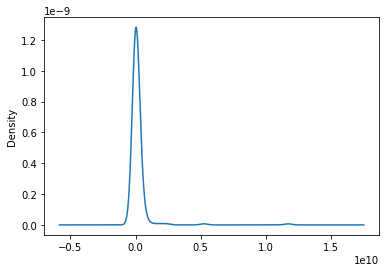

In [58]:
ax = final_df.carbon_emissions_from_energy_consumption_MT.plot.kde(bw_method=0.3)


In [59]:
co2_z_score = []
co2_mean = final_df['carbon_emissions_from_energy_consumption_MT'].mean()
co2_std = final_df['carbon_emissions_from_energy_consumption_MT'].std()
for i, row in final_df.iterrows():
       co2_z_score.append((row['carbon_emissions_from_energy_consumption_MT']-co2_mean)/co2_std)
        

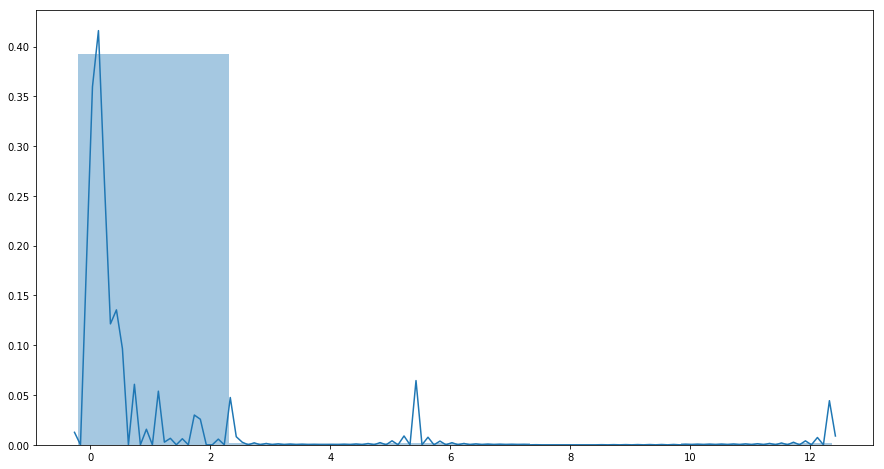

In [63]:
plt.figure(figsize =(15,8))
sns.distplot(co2_z_score, bins = 5)

In [64]:
mili_z_score = []
mili_mean = final_df['mili_exp_%_gdp'].mean()
mili_std = final_df['mili_exp_%_gdp'].std()
for i, row in final_df.iterrows():
    mili_z_score.append((row['mili_exp_%_gdp']-mili_mean)/mili_std)

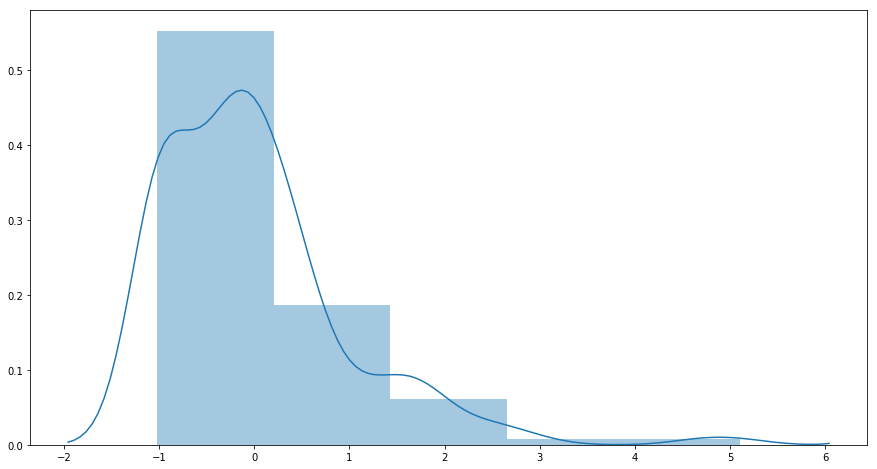

In [66]:
plt.figure(figsize =(15,8))
sns.distplot(mili_z_score, bins = 5)

In [67]:
int_z_score = []
int_mean = final_df['number_of_internet_users'].mean()
int_std = final_df['number_of_internet_users'].std()
for i, row in final_df.iterrows():
    int_z_score.append((row['number_of_internet_users']-int_mean)/int_std)

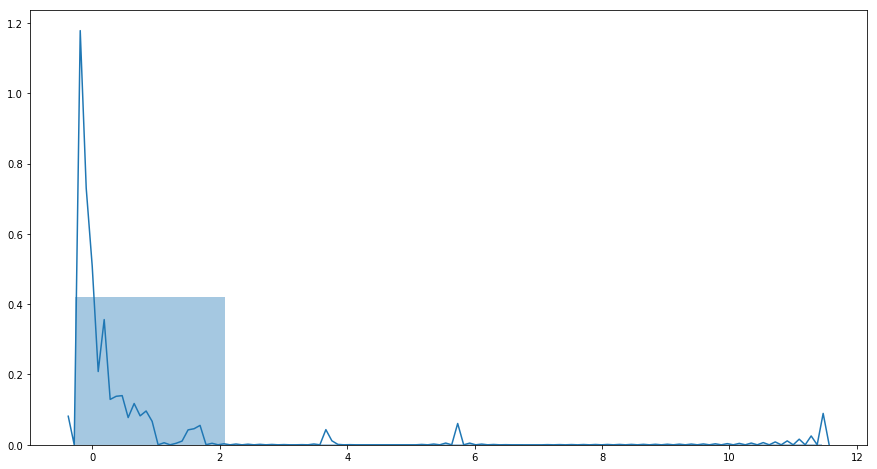

In [68]:
plt.figure(figsize =(15,8))
sns.distplot(int_z_score, bins = 5)

In [74]:
petrol_z_score = []
petrol_mean = final_df['refined_petroleum_consumption_barrels_per_day'].mean()
petrol_std = final_df['refined_petroleum_consumption_barrels_per_day'].std()
for i, row in final_df.iterrows():
    petrol_z_score.append((row['refined_petroleum_consumption_barrels_per_day']-petrol_mean)/petrol_std)

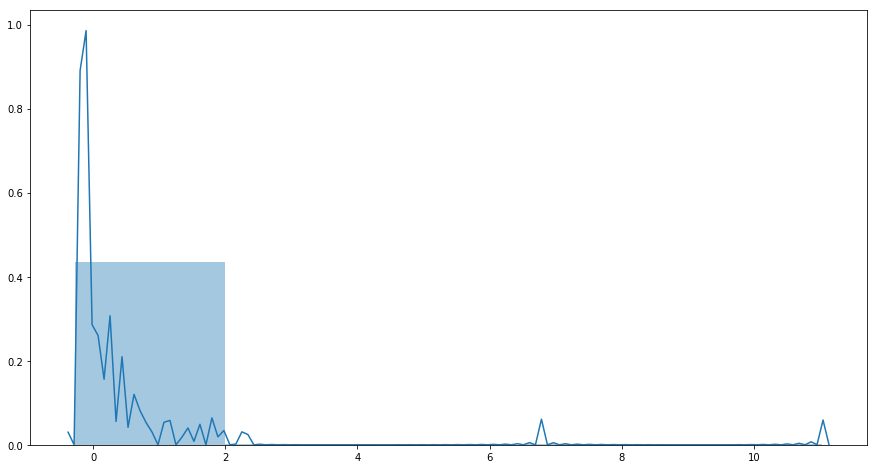

In [75]:
plt.figure(figsize =(15,8))
sns.distplot(petrol_z_score, bins = 5)

In [78]:
renew_z_score = []
renew_mean = final_df['renewable_electricity'].mean()
renew_std = final_df['renewable_electricity'].std()
for i, row in final_df.iterrows():
    renew_z_score.append((row['renewable_electricity']-renew_mean)/renew_std)

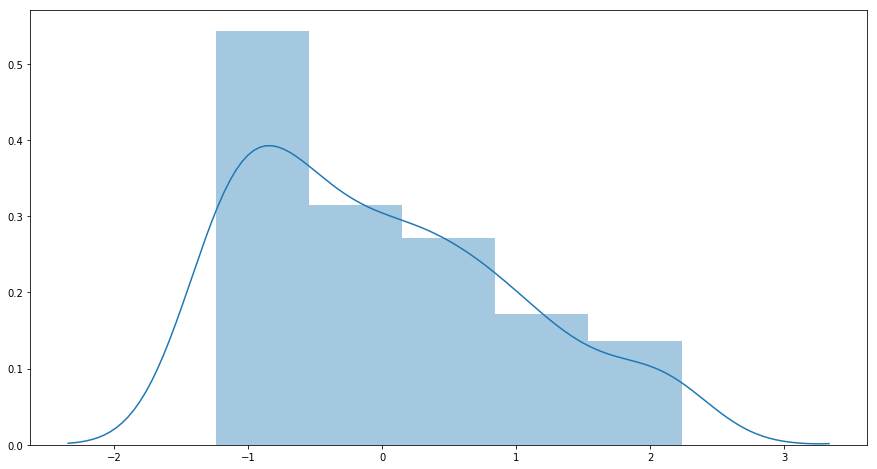

In [79]:
plt.figure(figsize =(15,8))
sns.distplot(renew_z_score, bins = 5)